In [1]:
from scipy.ndimage import correlate
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import median, gaussian, prewitt_h, \
    prewitt_v, prewitt,threshold_otsu
from skimage import img_as_ubyte
from skimage.color import rgb2gray

input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [2]:
# Exercise 1
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
res_img = correlate(input_img, weights)
print(res_img)
print(res_img[3,3])

# correlation: sum of "kernel multiplication"
# 13*1 + 17*1 + 18*2 + 19*1 + 23*1 = 108

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
108


In [3]:
# Exercise 2

# set the off-the-edge-pixel to have a constant value
# default mode is reflection padding
res_img = correlate(input_img, weights, mode="constant", cval=10)
print(res_img)

# the elements are only different along the borders

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


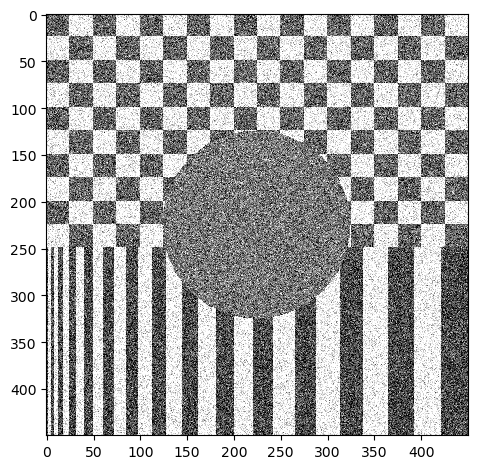

In [4]:
# Exercise 3
# mean filtering
im_dir = "data/"
im_name = "Gaussian.png"
input_img = io.imread(im_dir + im_name)
io.imshow(input_img)

size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
# print(weights)
res_img = correlate(input_img, weights)
# io.imshow(res_img)

In [5]:
# print(weights)

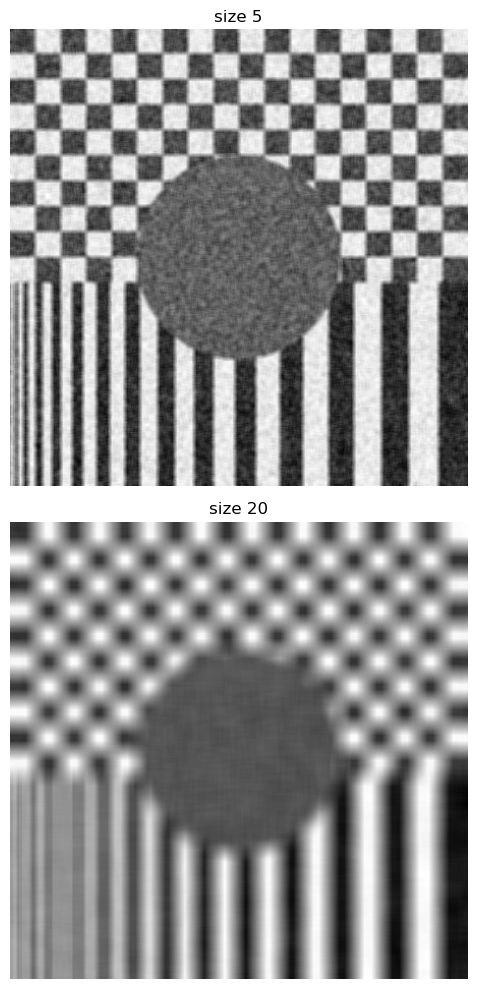

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))
ax0.set_title("size 5")
ax0.imshow(res_img, cmap='gray')
ax0.axis('off')

size = 20
weights = np.ones([size, size])
weights = weights / np.sum(weights)
res_img = correlate(input_img, weights)

ax1.set_title("size 20")
ax1.imshow(res_img, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

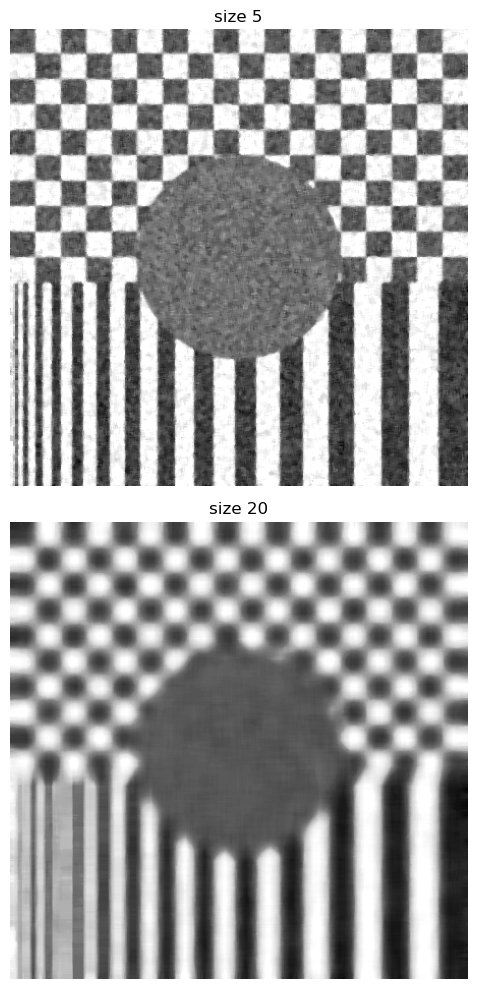

In [7]:
# Exercise 4

size = 5
footprint = np.ones([size, size])
med_img = median(input_img, footprint)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))
ax0.set_title("size 5")
ax0.imshow(med_img, cmap='gray')
ax0.axis('off')

size = 20
footprint = np.ones([size, size])
med_img = median(input_img, footprint)

ax1.set_title("size 20")
ax1.imshow(med_img, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

# image becomes is slightly blurred, less noisy
# higher filter size leads to greater blur
# places with transitions from light to dark become grey, visibly blurrer

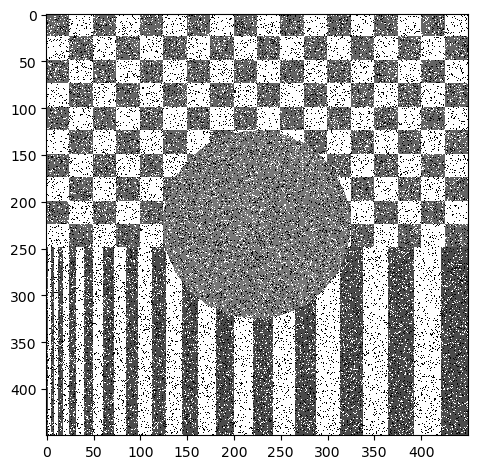

In [8]:
# Exercise 5
im_name = "SaltPepper.png"
input_img = io.imread(im_dir + im_name)
io.imshow(input_img)
io.show()

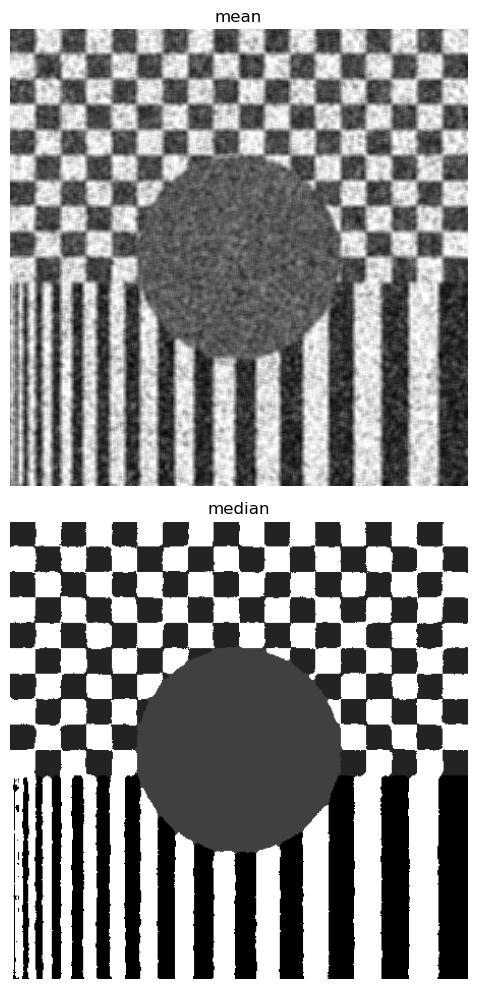

In [9]:
# median filtering
size = 7
footprint = np.ones([size, size])
med_img = median(input_img, footprint)
# io.imshow(med_img)

# mean filtering
size = 5
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img = correlate(input_img, weights)
# io.imshow(res_img)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))
ax0.set_title("mean")
ax0.imshow(mean_img, cmap='gray')
ax0.axis('off')

ax1.set_title("median")
ax1.imshow(med_img, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

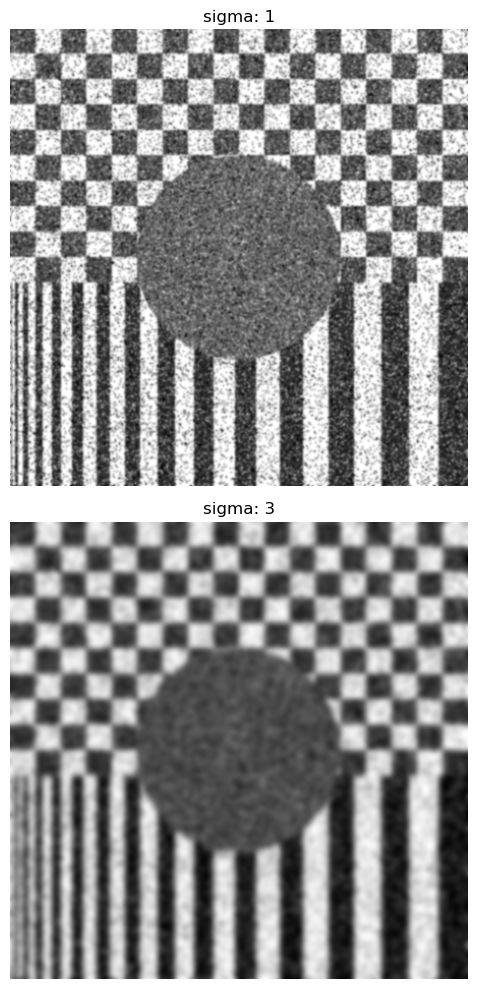

In [10]:
# Exercise 6

sigma = 1   # std of gaussian filter
gauss_img = gaussian(input_img, sigma)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))
ax0.set_title("sigma: 1")
ax0.imshow(gauss_img, cmap='gray')
ax0.axis('off')

sigma = 3   # std of gaussian filter
gauss_img = gaussian(input_img, sigma)

ax1.set_title("sigma: 3")
ax1.imshow(gauss_img, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

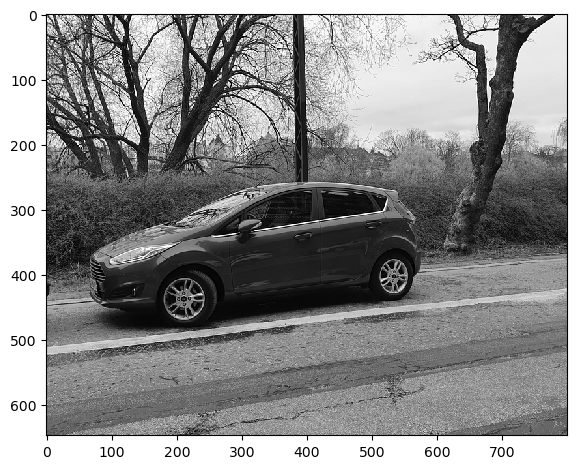

In [11]:
# Exercise 7

im_name = 'car.png'
input_img = io.imread(im_dir + im_name)
img_gray = rgb2gray(input_img)
io.imshow(img_gray)

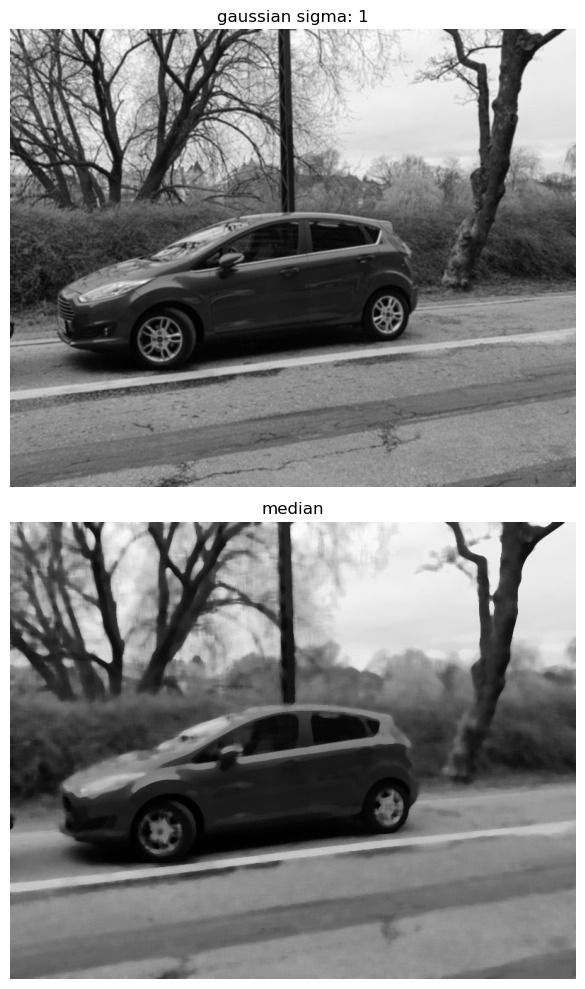

In [12]:
# mean filtering
sigma = 1   # std of gaussian filter
gauss_img = gaussian(img_gray, sigma)

# median filtering
size = 10
footprint = np.ones([size, size])
med_img = median(img_gray, footprint)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))
ax0.set_title("gaussian sigma: 1")
ax0.imshow(gauss_img, cmap='gray')
ax0.axis('off')

ax1.set_title("median")
ax1.imshow(med_img, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

# median filter: transition areas have higher contrast,
# more continuous areas of full white and full black
# gaussian filter: smoother colours

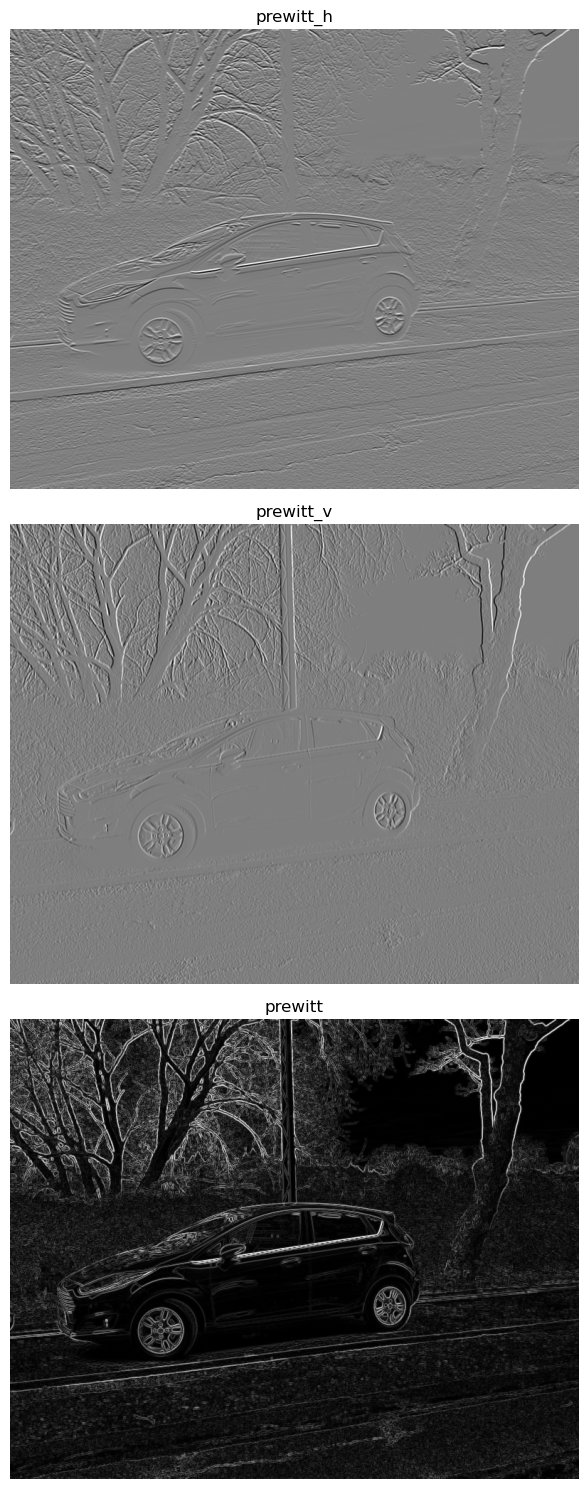

In [13]:
# Exercise 8
# prewitt filter is a simple gradient estimation filter to detect edges

edges_h = prewitt_h(img_gray)
edges_v = prewitt_v(img_gray)
edges = prewitt(img_gray)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize = (15,15))
ax0.set_title("prewitt_h")
ax0.imshow(edges_h, cmap='gray')
ax0.axis('off')

ax1.set_title("prewitt_v")
ax1.imshow(edges_v, cmap='gray')
ax1.axis('off')

ax2.set_title("prewitt")
ax2.imshow(edges, cmap='gray')
ax2.axis('off')

fig.tight_layout()
io.show()

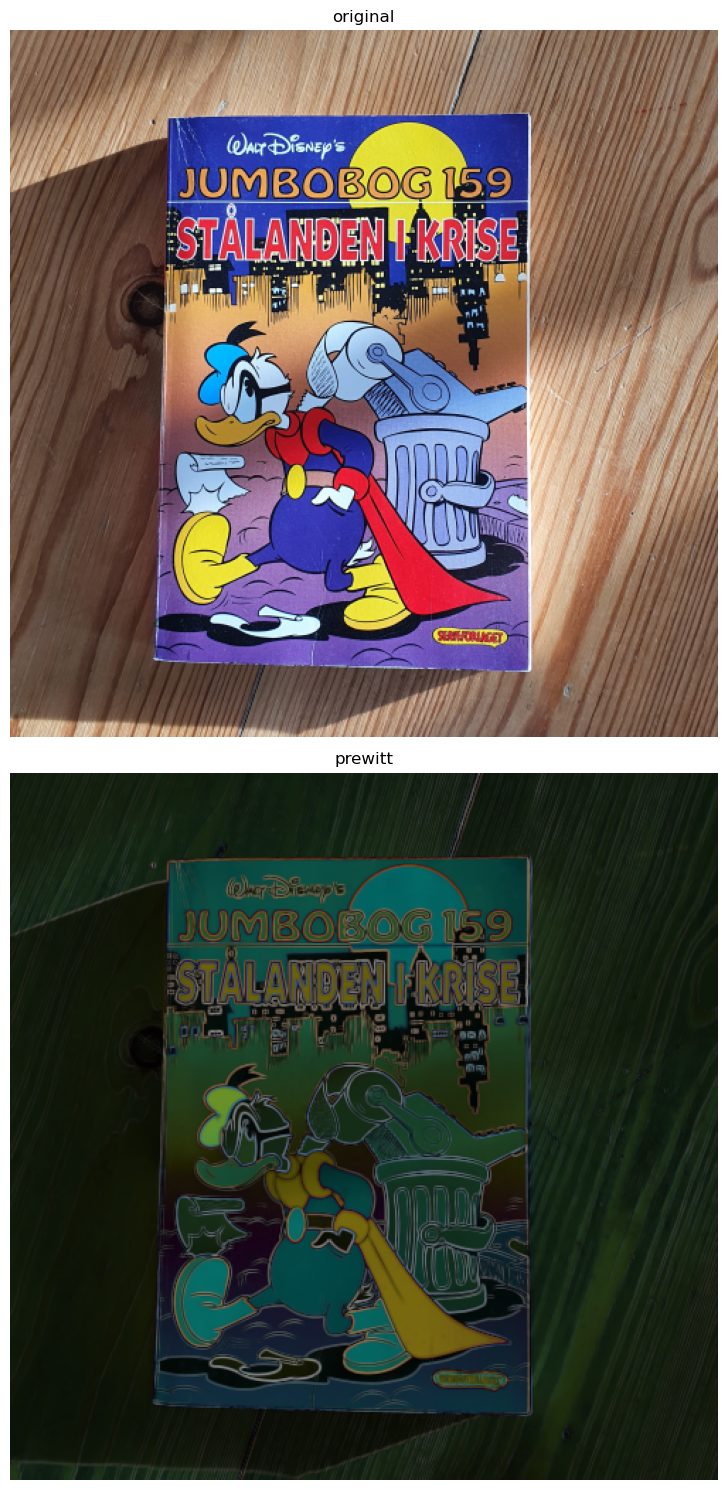

In [14]:
im_name = 'donald_1.png'
input_img = io.imread(im_dir + im_name)
edges = prewitt(input_img)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (15,15))
ax0.set_title("original")
ax0.imshow(input_img, cmap='gray')
ax0.axis('off')

ax1.set_title("prewitt")
ax1.imshow(edges, cmap='gray')
ax1.axis('off')

fig.tight_layout()
io.show()

In [15]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_out = img_in > thres
    
    return img_as_ubyte(img_out)

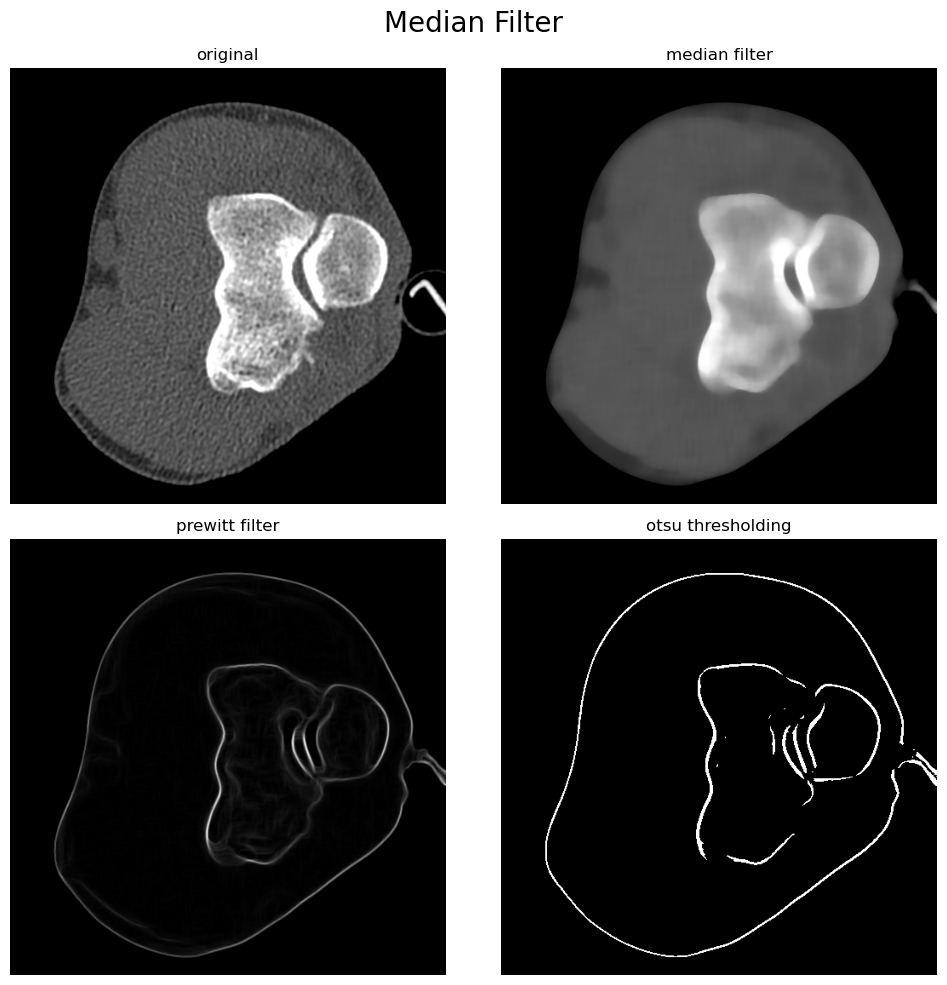

In [16]:
# Exercise 10

im_name = 'ElbowCTSlice.png'
input_img = io.imread(im_dir + im_name)

# median filtering
size = 20
footprint = np.ones([size, size])
med_img = median(input_img, footprint)

# prewitt filter
edge_img = prewitt(med_img)

# otsus thresholding
otsu_thres = threshold_otsu(edge_img)
thres_img = threshold_image(edge_img, otsu_thres)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                             ncols=2,figsize=(10,10))
ax0.set_title("original")
ax0.imshow(input_img, cmap='gray')
ax0.axis('off')

ax1.set_title("median filter")
ax1.imshow(med_img, cmap='gray')
ax1.axis('off')

ax2.set_title("prewitt filter")
ax2.imshow(edge_img, cmap='gray')
ax2.axis('off')

ax3.set_title("otsu thresholding")
ax3.imshow(thres_img, cmap='gray')
ax3.axis('off')

fig.suptitle('Median Filter',fontsize=20)
fig.tight_layout()
io.show()

# median filter seems to outperform mean filter

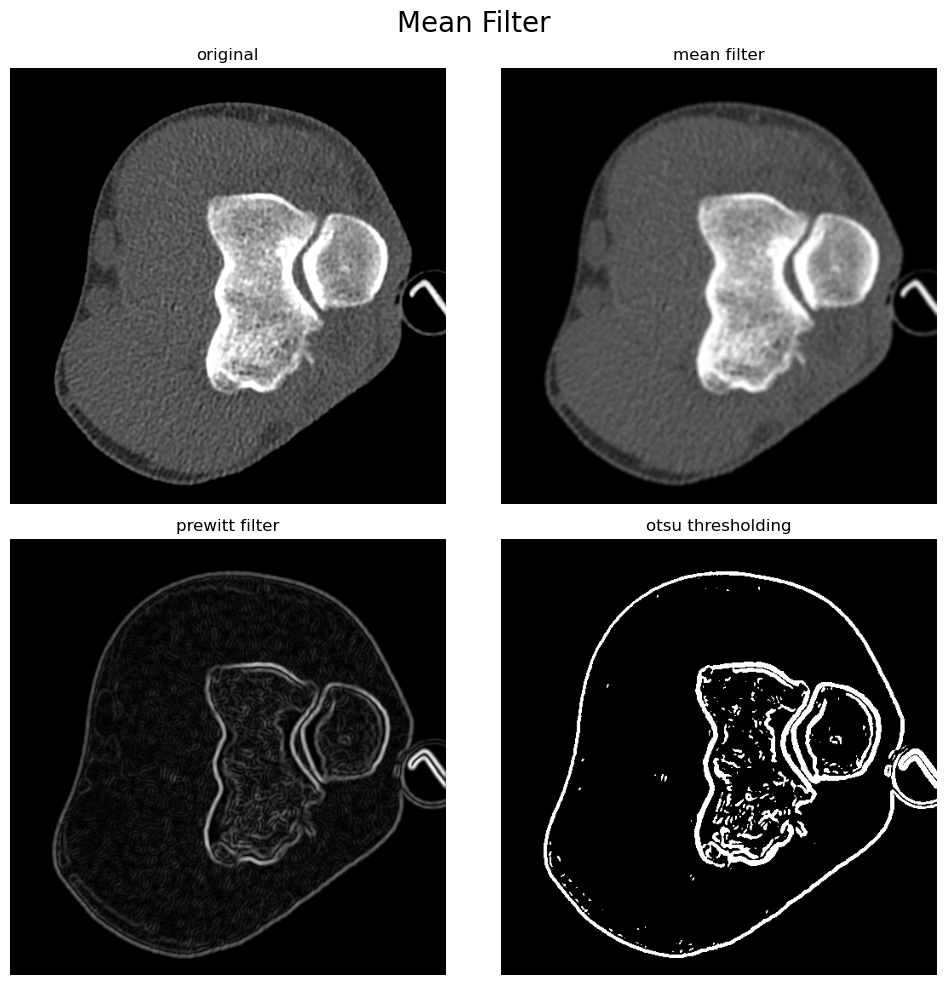

In [17]:
# mean filtering
size = 5
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img = correlate(input_img, weights)

# prewitt filter
edge_img = prewitt(mean_img)

# otsus thresholding
otsu_thres = threshold_otsu(edge_img)
thres_img = threshold_image(edge_img, otsu_thres)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                             ncols=2,figsize=(10,10))
ax0.set_title("original")
ax0.imshow(input_img, cmap='gray')
ax0.axis('off')

ax1.set_title("mean filter")
ax1.imshow(mean_img, cmap='gray')
ax1.axis('off')

ax2.set_title("prewitt filter")
ax2.imshow(edge_img, cmap='gray')
ax2.axis('off')

ax3.set_title("otsu thresholding")
ax3.imshow(thres_img, cmap='gray')
ax3.axis('off')

fig.suptitle('Mean Filter', fontsize=20)
fig.tight_layout()
io.show()

# larger filter size results in less noise, but more and thicker edges

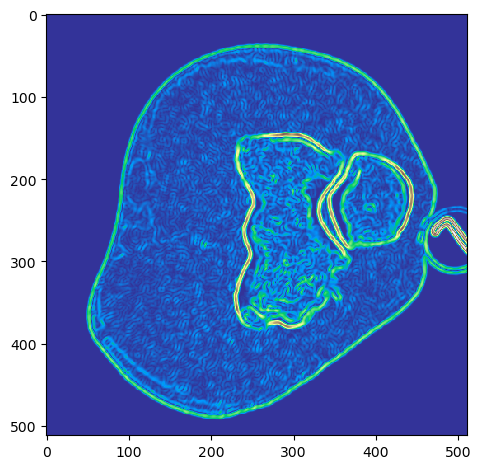

In [18]:
min_val = edge_img.min()
max_val = edge_img.max()
io.imshow(edge_img, vmin=min_val, vmax=max_val, cmap="terrain")
io.show()